# Math 86 Final Project

## Comparing AMM's

### Alex Craig, Wanxin Hu, Ganqi Li, Fangzhou Yu

## Part 1. Simple AMM

The simple AMM follows the model $xy = k$, where $k$ remains constant assuming no liquidity is provided or removed. Let's instantiate a simple AMM and see how it behaves.

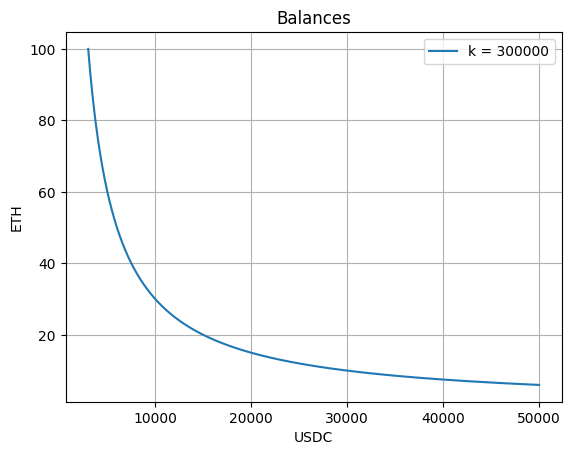

In [49]:
from simulations.simple import Simple
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

simple = Simple(3000, 100)

simple_balances = [[simple.x, simple.y]]

delta = 1
x_max = 50000

while simple.x < x_max:
    simple.swap_x_for_y(delta)
    simple_balances.append([simple.x, simple.y])
    
# Plot the balances
simple_balances = np.array(simple_balances)
plt.plot(simple_balances[:, 0], simple_balances[:, 1])
plt.title('Balances')
plt.xlabel('USDC')
plt.ylabel('ETH')
plt.grid()
plt.legend(['k = ' + str(simple.k)])

plt.show()

In [50]:
def calculate_impermanent_loss(new_price_ratio, initial_price_ratio = 1):
    price_ratio_change = new_price_ratio / initial_price_ratio
    il = 2 * (price_ratio_change ** 0.5) / (1 + price_ratio_change) - 1
    return il * 100  # Return IL as a percentage

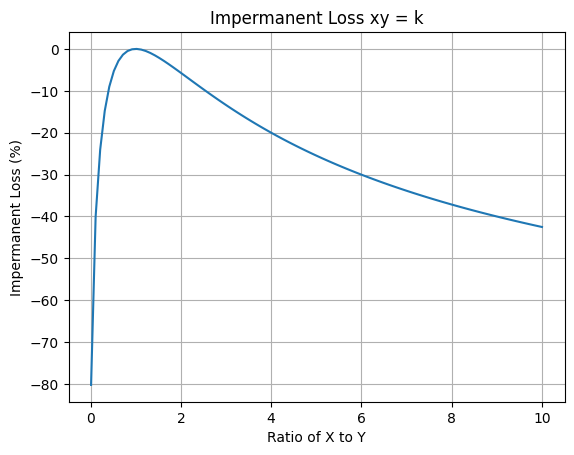

In [51]:
# Sample ratios
ratios = np.linspace(0.01, 10, 100)

# Calculate the impermanent loss
impermanent_losses = [calculate_impermanent_loss(r) for r in ratios]

# Plot the impermanent loss
plt.plot(ratios, impermanent_losses)
plt.title('Impermanent Loss xy = k')
plt.xlabel('Ratio of X to Y')
plt.ylabel('Impermanent Loss (%)')
plt.grid()
plt.show()

## Part 2. Uniswap v3

Let's plot the price curve of the uniswap v3 model.

In [57]:
from simulations.uniswapV3 import UniswapV3

total_liquidity = 3000 * 100
uniswapV3 = UniswapV3(0, 3000)
uniswapV3.instantiate_initial_liquidity_distribution(total_liquidity)
uniswapV3_balances = [[uniswapV3.price]]

delta = 1
x_max = 50000

while uniswapV3.x < x_max:
    uniswapV3.swap_x_for_y(delta)
    uniswapV3_balances.append([simple.x, simple.y])
    
# Plot the balances
uniswapV3_balances = np.array(uniswapV3_balances)
plt.plot(uniswapV3_balances[:, 0], uniswapV3_balances[:, 1])
plt.title('Balances Uniswap V3')
plt.xlabel('USDC')
plt.ylabel('ETH')
plt.grid()
plt.legend(['k = ' + str(simple.k)])

plt.show()

AttributeError: 'UniswapV3' object has no attribute 'x'